# Neural Networks

In [8]:
!pip install keras-tuner

   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   --- ------------------------------------ 10.2/129.1 kB ? eta -:--:--
   -------------------------------------- - 122.9/129.1 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 129.1/129.1 kB 1.9 MB/s eta 0:00:00


In [12]:
!pip install keras-tuner --upgrade


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
data = pd.read_csv("C:\\Users\\bommi\\OneDrive\\Desktop\\DATA_SCIENCE_ASSIGNMENTS\\Neural networks - 18\\Alphabets_data.csv")
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [22]:
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [24]:
data.shape

(20000, 17)

In [26]:
f1 = data.iloc[:,0:16]
forest = pd.concat([f1,data['yedgex']],axis=1)
forest

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


<Axes: xlabel='width', ylabel='height'>

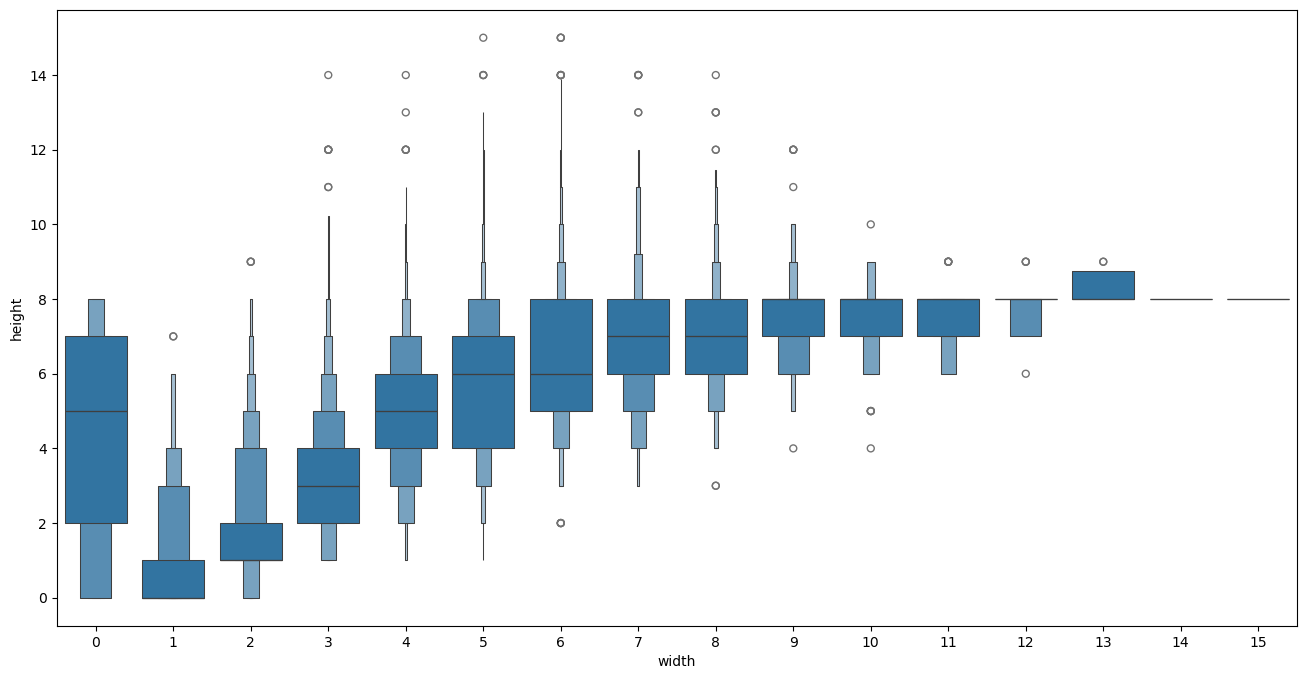

In [28]:
plt.figure(figsize = (16, 8));
sns.boxenplot(x = 'width', y = 'height', data = f1)

In [32]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='count', ylabel='letter'>

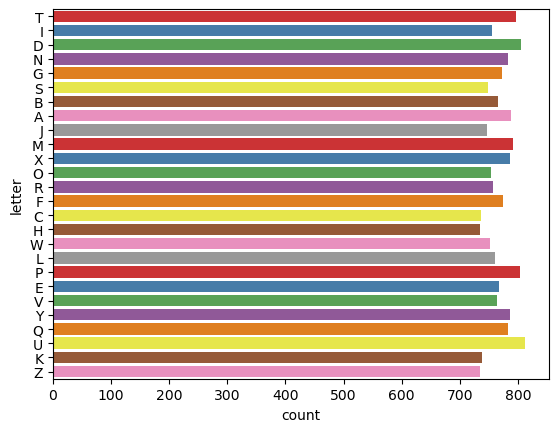

In [34]:
sns.countplot(f1['letter'], palette="Set1")

In [36]:
# Split into features (X) and target label (y)
X = data.drop('letter', axis=1)
Y = data['letter']

In [38]:
# Encode the labels (y) as numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

In [40]:
# Normalize the features (X) using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [42]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Check the shape of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 16), (4000, 16), (16000,), (4000,))

In [44]:
# Define the ANN model
model = Sequential()

# Input layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
# Hidden layer(s)
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
# Output layer (using softmax for multi-class classification)
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2254 - loss: 2.6526 - val_accuracy: 0.6622 - val_loss: 1.1690
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6901 - loss: 1.0538 - val_accuracy: 0.7575 - val_loss: 0.8288
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7671 - loss: 0.7737 - val_accuracy: 0.7993 - val_loss: 0.6888
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8000 - loss: 0.6614 - val_accuracy: 0.8300 - val_loss: 0.5833
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8319 - loss: 0.5615 - val_accuracy: 0.8440 - val_loss: 0.5268
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8486 - loss: 0.5058 - val_accuracy: 0.8608 - val_loss: 0.4844
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8633 - loss: 0.4500 - val_accuracy: 0.8695 - val_loss: 0.4489
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8805 - loss: 0.3990 - val_accuracy: 0.

In [46]:
# Convert the Series Y to a NumPy array
Y = Y.to_numpy()

# Use label encoding to convert the string labels to integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.0709 - loss: 54.2492
compile_metrics: 7.06%


In [48]:
model.metrics_names

['loss', 'compile_metrics']

In [50]:
scores

[54.55635452270508, 0.07055000215768814]

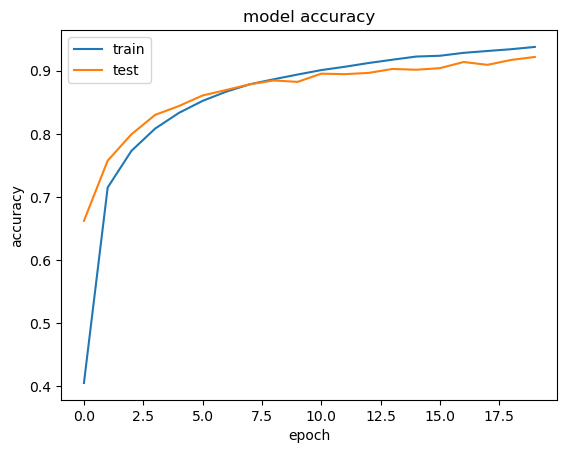

In [52]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


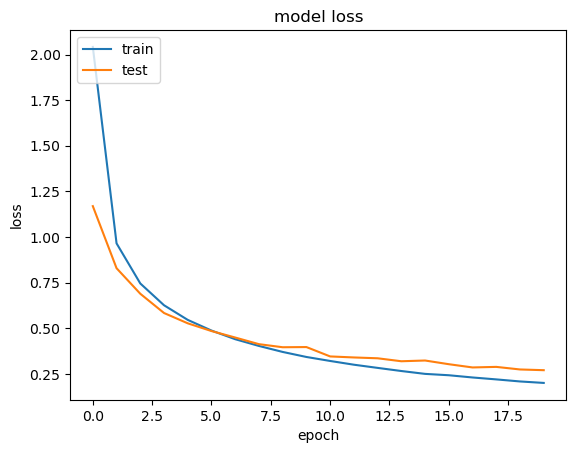

In [54]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Neural Network Hyper Parameter 

In [57]:
# Standardization

a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)


In [59]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,-1.030287e-16,3.659295e-17,-8.242296e-17,1.417533e-16,-1.003642e-16,1.104894e-16,4.156675e-17,1.747935e-16,-6.181722e-17,4.440892e-17,9.947598e-17,-1.083578e-16,-1.598721e-18,-4.732215e-16,6.039613e-17,1.790568e-16
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-2.103087e+00,-2.129084e+00,-2.542463e+00,-2.375788e+00,-1.600550e+00,-3.404567e+00,-3.225590e+00,-1.714360e+00,-2.175206e+00,-3.328246e+00,-2.453056e+00,-3.810980e+00,-1.305948e+00,-5.391438e+00,-1.438153e+00,-4.823208e+00
25%,-5.350039e-01,-6.159833e-01,-5.568812e-01,-6.069205e-01,-6.874762e-01,-4.430438e-01,-6.452728e-01,-6.032074e-01,-4.950723e-01,-5.152079e-01,-5.526407e-01,-4.465129e-01,-8.772199e-01,-2.190816e-01,-6.590356e-01,-4.953539e-01
50%,-1.230945e-02,-1.074302e-02,-6.048579e-02,2.775132e-01,-2.309392e-01,5.054332e-02,-2.152199e-01,-2.328234e-01,-7.503896e-02,-1.133453e-01,-1.725577e-01,3.412531e-02,-1.976435e-02,-2.190816e-01,-2.694771e-01,1.229111e-01
75%,5.103850e-01,5.944973e-01,4.359097e-01,7.197301e-01,6.821347e-01,5.441305e-01,6.448857e-01,5.079447e-01,7.650277e-01,6.903799e-01,5.876083e-01,5.147635e-01,4.089634e-01,4.274629e-01,5.096399e-01,7.411760e-01
max,5.737329e+00,2.410218e+00,4.903469e+00,4.257465e+00,5.247504e+00,3.999240e+00,3.225203e+00,3.841401e+00,4.125295e+00,2.699693e+00,3.248189e+00,3.398593e+00,5.124969e+00,4.306730e+00,4.405225e+00,4.450766e+00


## Create model using function: 

In [62]:
def create_model():
    model = Sequential()
    model.add(Dense(15, input_dim=11, init='uniform', activation='relu'))
    model.add(Dense(11, init='uniform', activation='relu'))
    model.add(Dense(26, init='uniform', activation='softmax'))

    adam=Adam(lr=0.01)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [64]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

### Tuning of Hyperparameters using different techniques 

 1.Batch Size and Epochs
2.
Learning rate and Drop out rat

3.
Activation Function and Kernel Initializer

####  1.Batch Size and Epochs

In [84]:
from keras.models import Sequential

# create model
model = Sequential()
model.add(Dense(14, input_dim=16,  activation='relu')) #1st layer - changed input_dim to 16 to match X_train
model.add(Dense(11,  activation='relu')) #2nd layer
model.add(Dense(26, activation='softmax')) #3rd layer or op layer
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
# Use X_train and y_train, which are the scaled and encoded data for training
history = model.fit(X_train, y_train, validation_split=0.33, epochs=20, batch_size=10)

Epoch 1/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1350 - loss: 3.0080 - val_accuracy: 0.4914 - val_loss: 1.6986
Epoch 2/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5500 - loss: 1.5265 - val_accuracy: 0.6398 - val_loss: 1.2145
Epoch 3/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6412 - loss: 1.1670 - val_accuracy: 0.6804 - val_loss: 1.0789
Epoch 4/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6808 - loss: 1.0521 - val_accuracy: 0.7027 - val_loss: 1.0033
Epoch 5/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6988 - loss: 0.9746 - val_accuracy: 0.7061 - val_loss: 0.9511
Epoch 6/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7247 - loss: 0.8954 - val_accuracy: 0.7281 - val_loss: 0.8897
Epoch 7/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7404 - loss: 0.8473 - val_accuracy: 0.7372 - val_loss: 0.8538
Epoch 8/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7428 - loss: 0.8301 - 

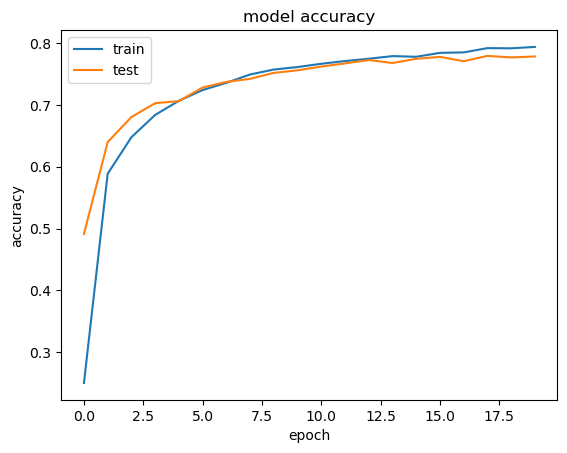

In [86]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

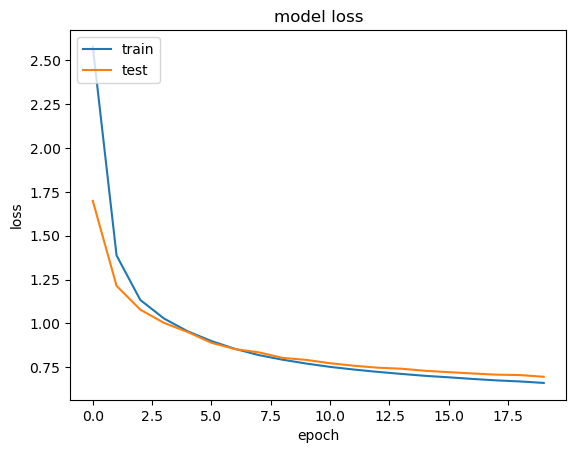

In [88]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#### 2. Learning rate and Drop out rate 

In [91]:
# Define the model
from keras.layers import Dropout # import Dropout
def create_model(learning_rate=0.001, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(11, input_dim=16, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(14, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(26, activation='softmax'))  # For binary classification

    adam = Adam(learning_rate=learning_rate)

    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy']) # changed loss function

    return model

# Create the KerasClassifier with placeholder arguments for GridSearchCV
model = KerasClassifier(build_fn=create_model, verbose=0, batch_size=40, epochs=50)

# Define the grid search parameters
learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

# Create a dictionary of the grid search parameters
# Use double underscore to separate the function name and parameter name
param_grids = {'model__learning_rate': learning_rate, 'model__dropout_rate': dropout_rate}

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grids, cv=KFold(), verbose=10)

# Fit the grid search
grid_result = grid.fit(X_standardized, Y)

# Print the best parameters and result
print(f"Best Score: {grid_result.best_score_}")
print(f"Best Params: {grid_result.best_params_}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START model__dropout_rate=0.0, model__learning_rate=0.001.........
[CV 1/5; 1/9] END model__dropout_rate=0.0, model__learning_rate=0.001;, score=0.806 total time=  19.3s
[CV 2/5; 1/9] START model__dropout_rate=0.0, model__learning_rate=0.001.........
[CV 2/5; 1/9] END model__dropout_rate=0.0, model__learning_rate=0.001;, score=0.815 total time=  17.6s
[CV 3/5; 1/9] START model__dropout_rate=0.0, model__learning_rate=0.001.........
[CV 3/5; 1/9] END model__dropout_rate=0.0, model__learning_rate=0.001;, score=0.798 total time=  18.1s
[CV 4/5; 1/9] START model__dropout_rate=0.0, model__learning_rate=0.001.........
[CV 4/5; 1/9] END model__dropout_rate=0.0, model__learning_rate=0.001;, score=0.815 total time=  18.2s
[CV 5/5; 1/9] START model__dropout_rate=0.0, model__learning_rate=0.001.........
[CV 5/5; 1/9] END model__dropout_rate=0.0, model__learning_rate=0.001;, score=0.781 total time=  17.9s
[CV 1/5; 2/9] START 

In [93]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.81035, using {'model__dropout_rate': 0.0, 'model__learning_rate': 0.01}
0.80305,0.012577161842005536 with: {'model__dropout_rate': 0.0, 'model__learning_rate': 0.001}
0.81035,0.013150665382405556 with: {'model__dropout_rate': 0.0, 'model__learning_rate': 0.01}
0.27880000000000005,0.014475323830574566 with: {'model__dropout_rate': 0.0, 'model__learning_rate': 0.1}
0.7456,0.015413143741625192 with: {'model__dropout_rate': 0.1, 'model__learning_rate': 0.001}
0.7312,0.014118604746928798 with: {'model__dropout_rate': 0.1, 'model__learning_rate': 0.01}
0.09584999999999999,0.018987890878135988 with: {'model__dropout_rate': 0.1, 'model__learning_rate': 0.1}
0.70435,0.014649744025067484 with: {'model__dropout_rate': 0.2, 'model__learning_rate': 0.001}
0.6914499999999999,0.012527370035246833 with: {'model__dropout_rate': 0.2, 'model__learning_rate': 0.01}
0.06525,0.003391164991562637 with: {'model__dropout_rate': 0.2, 'model__learning_rate': 0.1}


#### 3. Activation Function and Kernel Initializer 

In [96]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(64,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(32,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(26,activation = 'softmax'))

    adam = adam(lr = 0.001)
    model.compile(loss = 'sparse_categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [98]:
# Create the model

model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 40,
                        epochs = 50)

In [100]:
# Define the grid search parameters
activation_function = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,
                   init = init)

In [102]:
# Define the model
def create_model(activation_function='relu',init='normal'): # Removed extraneous arguments
    model = Sequential()
    model.add(Dense(64, input_dim=16, kernel_initializer=init, activation=activation_function))
    model.add(Dropout(0.2)) # Set dropout rate to constant
    model.add(Dense(32, kernel_initializer=init, activation=activation_function))
    model.add(Dropout(0.2)) # Set dropout rate to constant
    model.add(Dense(26, activation='softmax'))  # For binary classification

    adam = Adam(learning_rate=0.001) # Set learning rate to constant

    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

# Create the KerasClassifier with placeholder arguments for GridSearchCV
model = KerasClassifier(build_fn=create_model, verbose=0, batch_size=40, epochs=50)

# Define the grid search parameters
activation_function = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

# Create a dictionary of the grid search parameters
# Use double underscore to separate the function name and parameter name
param_grids = {'model__activation_function':activation_function,
               'model__init':init
              }

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grids, cv=KFold(), verbose=10)

# Fit the grid search
grid_result = grid.fit(X_standardized, Y)

# Print the best parameters and result
print(f"Best Score: {grid_result.best_score_}")
print(f"Best Params: {grid_result.best_params_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START model__activation_function=softmax, model__init=uniform....
[CV 1/5; 1/12] END model__activation_function=softmax, model__init=uniform;, score=0.749 total time=  21.4s
[CV 2/5; 1/12] START model__activation_function=softmax, model__init=uniform....
[CV 2/5; 1/12] END model__activation_function=softmax, model__init=uniform;, score=0.789 total time=  20.4s
[CV 3/5; 1/12] START model__activation_function=softmax, model__init=uniform....
[CV 3/5; 1/12] END model__activation_function=softmax, model__init=uniform;, score=0.753 total time=  20.2s
[CV 4/5; 1/12] START model__activation_function=softmax, model__init=uniform....
[CV 4/5; 1/12] END model__activation_function=softmax, model__init=uniform;, score=0.754 total time=  20.0s
[CV 5/5; 1/12] START model__activation_function=softmax, model__init=uniform....
[CV 5/5; 1/12] END model__activation_function=softmax, model__init=uniform;, score=0.761 total time=  

In [104]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))
    

Best : 0.9009499999999999, using {'model__activation_function': 'relu', 'model__init': 'normal'}
0.76125,0.014442125882293102 with: {'model__activation_function': 'softmax', 'model__init': 'uniform'}
0.76395,0.012056533498481244 with: {'model__activation_function': 'softmax', 'model__init': 'normal'}
0.7325000000000002,0.022224423502084364 with: {'model__activation_function': 'softmax', 'model__init': 'zero'}
0.8965499999999998,0.006988204347327016 with: {'model__activation_function': 'relu', 'model__init': 'uniform'}
0.9009499999999999,0.0055641710972974155 with: {'model__activation_function': 'relu', 'model__init': 'normal'}
0.03765,0.0015049916943292423 with: {'model__activation_function': 'relu', 'model__init': 'zero'}
0.8836999999999999,0.010365085624344822 with: {'model__activation_function': 'tanh', 'model__init': 'uniform'}
0.8801499999999999,0.010450598069010185 with: {'model__activation_function': 'tanh', 'model__init': 'normal'}
0.03855,0.0016385969608173955 with: {'model__a